## Image Pre Processing
#### Resizing Images to 128x128
#### Normalizing pixel values


In [2]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Set path to the dataset
base_path = r"/Users/mary/Downloads/F21DL/Leaf images"


In [3]:
from PIL import UnidentifiedImageError

# Load and preprocess images by class
def load_and_preprocess_images(base_path, target_size=(128, 128)):
    # Dictionary to hold processed images categorized by their class
    preprocessed_data = {}

    # Loop through each category folder (e.g., Healthy, Miner, Phoma, Leaf Rust, Cerscospora)
    for class_folder in os.listdir(base_path):
        class_path = os.path.join(base_path, class_folder)
        if os.path.isdir(class_path):
            images = []
            
            # Loop through each image in the class folder
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                
                # Check if it's a valid image file
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    try:
                        image = Image.open(img_path)
                        
                        # Preprocessing steps
                        processed_img = preprocess_image(image, target_size)
                        
                        # Append processed image to list
                        images.append(processed_img)
                    except Exception as e:
                        print(f"Error processing file {img_path}: {e}")
            
            # Add to dictionary
            preprocessed_data[class_folder] = images

    return preprocessed_data


In [6]:
def preprocess_image(image, target_size):
    
    # 1. Resize Images 
    image = image.resize(target_size)
    
    # 2. Normalize pixel values
    image = np.array(image) / 255.0  # Convert to numpy array and scale
    return image

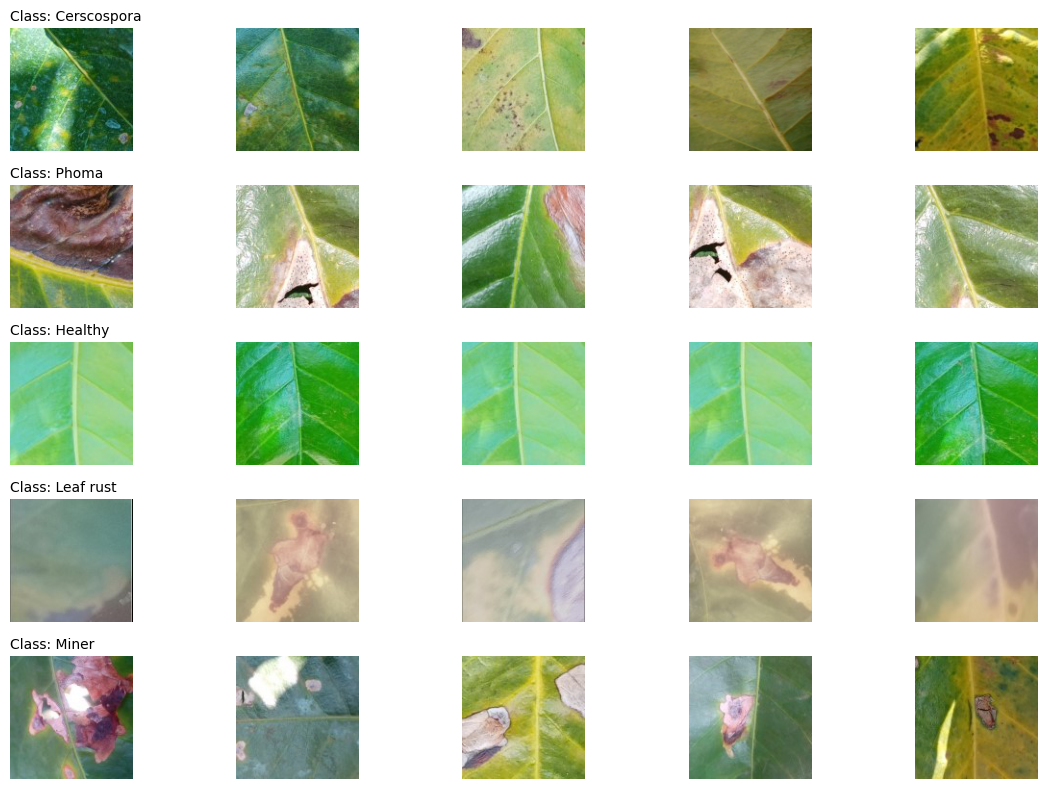

In [8]:
# Process all images
preprocessed_data = load_and_preprocess_images(base_path)

# Display processed images by class
fig = plt.figure(figsize=(12, 8))

# Counter for subplot positioning
subplot_idx = 1

# Display images for each class
for class_name, images in preprocessed_data.items():
    # Display only the first 5 images for each class
    for i in range(min(5, len(images))):
        ax = fig.add_subplot(len(preprocessed_data), 5, subplot_idx)
        ax.imshow(images[i])
        ax.axis('off')
        if i == 0:
            # Set class name as title for the first image in each row
            ax.set_title(f"Class: {class_name}", loc='left', fontsize=10)
        subplot_idx += 1

plt.tight_layout()
plt.show()

#### Saving pre processed images

In [18]:
output_path = r"/Users/mary/Downloads/F21DL/Processed Leaf images"

for class_name, images in preprocessed_data.items():
    class_output_path = os.path.join(output_path, class_name)
    os.makedirs(class_output_path, exist_ok=True)
    
    for i, img in enumerate(images):
        img = (img * 255).astype(np.uint8)  # Convert back to 8-bit values
        img_pil = Image.fromarray(img)
        img_pil.save(os.path.join(class_output_path, f"{class_name}_{i}.png"))
